<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math

***Với bài này ta sẽ dùng thư viện:***
 - **numpy để load data và xử lí dữ liệu**
 - **matplotlib dùng để vẽ biểu đồ tạo sự thuận tiện cho việc quan sát dữ liệu**
 - **sklearn dùng để xử lí phần và đánh giá model**
 - **math để dùng hàm log tăng số lượng Feature**

In [0]:
# load và xử lí data
 
url = 'http://cs.uit.edu.vn/data3.txt'
 
Dataset = np.loadtxt(url , delimiter = ',')

# chia dataset thành 2 phần X (feature) và Y(label)
X = Dataset[:,0]
Y = Dataset[:,1:]

# chia dữ liệu thành 2 phần train và test
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)


***Dùng hàm loadtxt của thư viện numpy để load data từ url , sao đó tách thành 2 phần X (feature) và Y(label) , tiếp đến dùng hàm train/test_split để chia dữ liệu thành 2 phần train và test***

In [0]:
# hàm tăng feature

def UpFeature(X):
  # tăng cột X^2
  X_pow = X**2

  # tăng cột X.log(X)
  X_log = np.array([])

  for i in range(len(X)):
    temp = X[i]*math.log(X[i])
    X_log = np.append(X_log,temp)

  # tạo thành mảng mới
  X_new = np.array([X,X_pow,X_log])

  X_new = np.transpose(X_new)
  return X_new


#***Hàm tăng số lượng feature lên 2 cột là X^2 và X.log(X)***

In [0]:
# Tăng số lượng Feature cho data train và data test
X_train_new = UpFeature(X_train)
X_test_new = UpFeature(X_test)

# xoay ma trận cho dữ liệu có 1 vecto dùng để train model cũ 
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

***Update sau khi tăng số lượng data và chuẩn hóa dữ liệu cũ trước khi train model***

In [0]:
# xây dựng và đánh giá model
 
my_model = LinearRegression().fit(X_train,Y_train)
result = my_model.predict(X_test)

***Sử dụng model bên round 2 với data round 3***

In [0]:
# xây dựng model mới dự trên kỹ thuật Features Enginering

New_model = LinearRegression().fit(X_train_new,Y_train)
New_result = New_model.predict(X_test_new)

***Sử dụng data sau khi tăng số lượng feature để tạo model mới***

In [65]:
# Đánh giá model 

# model cũ 
print("Đánh giá model cũ : ")
print("\tHệ số w: " , my_model.coef_)
print("\tMSE : " , mean_squared_error(Y_test,result))
print("\tĐộ chính xác: " , r2_score(Y_test,result))



Đánh giá model cũ : 
	Hệ số w:  [[9.27290489e-08]]
	MSE :  0.0029732305247697818
	Độ chính xác:  0.9897290008911028


# ***Độ chính xác giảm xuống so với round 2, Vì độ rộng của data 3 (10590) nhỏ hơn nhiều so với data 2 (71115) vì thế model 2 có độ chính xác cao hơn so với model 3***


In [66]:
# model mới
print("Đánh giá model mơi : ")
print("\tHệ số w: " , New_model.coef_)
print("\tMSE : " , mean_squared_error(Y_test,New_result))
print("\tĐộ chính xác: " , r2_score(Y_test,New_result))

incr_percent = 100*(r2_score(Y_test,New_result)-r2_score(Y_test,result))
print("increase : %.5f" % incr_percent)

Đánh giá model mơi : 
	Hệ số w:  [[ 6.34826082e-07  6.52316668e-16 -3.19265684e-08]]
	MSE :  0.0029729965832469333
	Độ chính xác:  0.9897298090400682
increase : 0.00008


***Sao khi áp dụng kĩ thuật tăng số Feature thì độ chính xác có tăng khoảng 0.00008%***

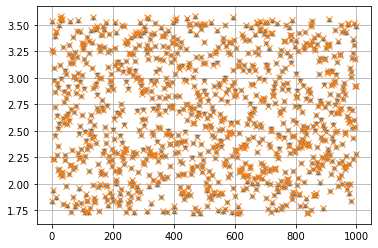

In [73]:
# đánh giá kết quả predict 1000 phần tử đầu của 2 model
head_old = result[:,0]
head_old = head_old[:1000,]

head_new = New_result[:,0]
head_new = head_new[:1000,]


Arr = np.arange(1000)
plt.plot(Arr,head_old,'.')
plt.plot(Arr,head_new,'x')

plt.grid()
plt.show()


- ***So với model cũ thì model mới được cải thiện hơn chút ít ( MSE giảm và độ chính xác được tăng lên )***
- ***Nguyên nhân là do số lượng feature tăng lên bộ dữ liệu dùng để train cũng tăng lên vì thế model cho kết quả chính xác hơn*** 
- ***Tuy nhiên, từ đồ thị trên ta có thể thấy giữa kết quả dự đoán của 2 model gần như trùng nhau chỉ sai khác rất ít***